# CS231n Winter 2016: Lecture 2
## Topics: Data-driven approach, kNN, Linear Classification 1

video:
https://www.youtube.com/watch?v=8inugqHkfvE

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/8inugqHkfvE?rel=0&amp;controls=1&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

## Preconditions
Used Data sets: **CIFAR-10**
- 10 labels
- 50,000 training images (32x32)
- 10,000 test images
- keras has it (`from keras.datasets import cifar10`)
- https://github.com/tensorflow/models/tree/master/tutorials/image/cifar10 or https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/cifar10.py - fetch for tensorflow

In [2]:
%matplotlib inline

from keras.datasets import cifar10
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Common Classifier

In [3]:
def train(train_images, train_labels):
    # build model
    return model

def predict(model, test_images):
    # predict
    return test_labels

## Nearest Neighbour Classifier
property
- accuracy on training set is 100%
- speed: 
$$
distance_speed = width*height*num_trained_samples 
$$
$$
atgmin_speed = num_trained_samples
$$
$$
speed = distance_speed
$$
- libs FLANN - fast library for aproximate NN

In [4]:
class NearestNeighbour:
    def train(self, X, y):
        """
        train model with example and labels
        """
        # remember all images
        assert len(X.shape) == 4
        assert len(y.shape) == 2
        self.X_trained = X
        self.y_trained = y
        return self

    def predict(self, X):
        """
        Predict labels for items
        """
        
        if len(X.shape) == 3:
            X = np.expand_dims(X, axis=0)
            
        assert len(X.shape) == 4
        
        for instance in X:
            # - manhattan distance (L1 distance)
            distance = np.sum(np.abs(self.X_trained - instance), axis = (1,2,3))
            min_index = np.argmin(distance)
            yield self.y_trained[min_index][0]

In [5]:
nn = NearestNeighbour().train(x_train, y_train)
%time list(nn.predict(x_test[:10]))

CPU times: user 2.56 s, sys: 1.06 s, total: 3.62 s
Wall time: 3.63 s


[8, 8, 1, 0, 4, 2, 2, 5, 0, 8]

### kNN

big differences to Nearest Neighbour are
- get k-instances the most likely 
- make majority vote

property:
- for k > 1, accuracy on training set is < 100%
- k - hyper parameter
- in comparison to Nearest Neighbour it smoothes boundaries

practice
- never used on images
- terrible performance on test time
- distance metrics on level of whole images can be very unintuitive

In [6]:
class KNearestNeighbour:
    def __init__(self, k=5):
        self.k = k

    def train(self, X, y):
        """
        train model with example and labels
        """
        # remember all images
        assert len(X.shape) == 4
        assert len(y.shape) == 2
        self.X_trained = X
        self.y_trained = y
        return self

    def predict(self, X):
        """
        Predict labels for items
        
        it will return the most likely class, probability of each class and list of the most likely images
        """
        
        if len(X.shape) == 3:
            X = np.expand_dims(X, axis=0)
            
        assert len(X.shape) == 4
        
        for instance in X:
            # - manhattan distance (L1 distance)
            distance = np.sum(np.abs(self.X_trained - instance), axis = (1,2,3))
            min_indexes = distance.argsort()[:self.k]
            counts = np.bincount(self.y_trained[min_indexes].ravel())
            yield np.argmax(counts), counts / counts.sum(), min_indexes

In [7]:
nn = KNearestNeighbour().train(x_train, y_train)
%time res = list(nn.predict(x_test[:10]))
pprint(res)

CPU times: user 2.86 s, sys: 930 ms, total: 3.79 s
Wall time: 3.8 s
[(0,
  array([ 0.4,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0.4]),
  array([26608, 48381,  5699, 31426,   557])),
 (1,
  array([ 0. ,  0.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.4]),
  array([17592, 30047, 13109, 44448, 13239])),
 (8,
  array([ 0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0.2]),
  array([30047,  5675, 37678,   860, 33626])),
 (0,
  array([ 0.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.4]),
  array([49245, 44350, 24315,   115, 24164])),
 (0,
  array([ 0.4,  0. ,  0. ,  0.2,  0.2,  0.2]),
  array([10296, 23874, 41484,  9413, 46812])),
 (2,
  array([ 0.2,  0. ,  0.4,  0. ,  0.2,  0. ,  0.2]),
  array([13752, 46902, 27651, 26976, 31536])),
 (4,
  array([ 0. ,  0. ,  0.4,  0. ,  0.6]),
  array([10683, 32803,  6924,   804, 11582])),
 (0,
  array([ 0.2,  0. ,  0.2,  0. ,  0.2,  0.2,  0.2]),
  array([32511,  7074, 15886, 23549,  7365])),
 (0,
  array([ 0.8,  0. ,  0. ,  0. ,  0. ,  0.2]),
  ar

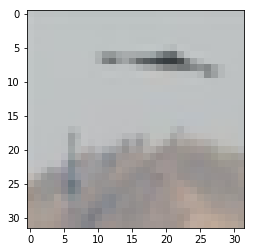

In [8]:
# TODO: draw test image and then a list of the most likely images (like in lecture)
plt.imshow(x_test[0]), plt.imshow(x_train[res[0][2][2]]);

## Tuning hyper parameters

use cross validation on folds and forget about test set until we will ready to make finaly estimation

In [9]:
# TODO: try cross validatino on cifar-10
# - show graphics _accuracy by k_ and animate it